# #️⃣Introduction
Welcome to the **students Performance analysis** where we interprete the data of the **Students performance dataset** in order to discover patterns and ways in which students are able to achieve good grades and high scores. We'll search for correlations between features as well as other relationships that will help us achieve our goal. In this project we'll of course handle missing values, sort out the biases in the data and normalize skewed distrubutions (if any)

-------------------------
## 🎯Project goal
Investigate patterns as to how and why students are able to achieve good performance based on certain features like hours of study or sleep, attendance, class participation, extracurriculars and so on.

-------------------------
## 📊Analysis
Here we'll analyse, clean, visualize and draw insightful conclusions on the data, in our analysis we'll sort out the various biases that come with the data like how the `Grade` column doesn't refleact the academic performance of a student and so on.

-------------------------
## 💾Data
This dataset is real data of 5,000 records collected from a private learning provider.
The dataset includes key attributes necessary for exploring patterns, correlations, and insights related to academic performance. Dataset contains some missing values, bias in some features and imbalanced distribution.


| <h1>Columns</h1>              |   <h1>Information</h1>                 |
| -----------                   | -----------------                      |
| Student_ID                    |     Unique identifier for each student.|
| First_Name                    |     Student’s first name.              
| Last_Name                     |     Student’s last name.
| Email                         |     Contact email (can be anonymized).
| Gender                        |     Male, Female, Other.
| Age                           |     The age of the student.
| Department                    |     Student's department (e.g., CS, Engineering, Business).
| Attendance (%)                |     Attendance percentage (0-100%).
| Midterm_Score                 |     Midterm exam score (out of 100).
| Final_Scor                    |     Final exam score (out of 100).
| Assignments_Avg               |     Average score of all assignments (out of 100).
| Quizzes_Avg                   |     Average quiz scores (out of 100).
| Participation_Score           |     Score based on class participation (0-10).
| Projects_Score                |     Project evaluation score (out of 100).
| Total_Score                   |     Weighted sum of all grades.
| Grade                         |     Letter grade (A, B, C, D, F).
| Study_Hours_per_Week          |     Average study hours per week.
| Extracurricular_Activities    |     Whether the student participates in extracurriculars (Yes/No).
| Internet_Access_at_Home       |     Does the student have access to the internet at home? (Yes/No).
| Parent_Education_Level        |     Highest education level of parents (None, High School, Bachelor's, Master's, PhD).
| Family_Income_Level           |     Low, Medium, High.
| Stress_Level (1-10)           |     Self-reported stress level (1: Low, 10: High).
| Sleep_Hours_per_Night         |     Average hours of sleep per night.



-------------------------------------
## 🤔Questions:
- What factors contribute most to high student performance?
- Does family background influence academic success?
- How does gender relate to scores?
- Do extracurricular activities impact grades?
- Do stress levels negatively impact academic performance?
- Are students with more sleep performing better?
- Is the any **significant** difference in the average scores of various departments?


In [1]:
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import chi2_contingency



# Descriptive Analysis
Here we get to know our data well using summary statistics like measures of central tendency and the likes of it. 

In [2]:
# loading dataset
data = pd.read_csv('Students_Grading_Dataset.csv')

df = data.copy()
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,None,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [3]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

df.describe(include="all")

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000,5000,5000,5000,5000,5000.000000,5000,4484.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000,5000.000000,5000,5000,4016,5000,5000.00000,5000.000000
unique,5000,8,6,5000,2,NaN,4,NaN,NaN,NaN,...,NaN,NaN,5,NaN,2,2,5,3,NaN,NaN
top,S1000,Maria,Johnson,student0@university.com,Male,NaN,CS,NaN,NaN,NaN,...,NaN,NaN,A,NaN,No,Yes,PhD,Low,NaN,NaN
freq,1,657,868,1,2551,NaN,2022,NaN,NaN,NaN,...,NaN,NaN,1495,NaN,3493,4485,820,1983,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,21.048400,NaN,75.431409,70.326844,69.640788,...,74.924860,75.121804,NaN,17.658860,NaN,NaN,NaN,NaN,5.48080,6.488140
std,NaN,NaN,NaN,NaN,NaN,1.989786,NaN,14.372446,17.213209,17.238744,...,14.423415,14.399941,NaN,7.275864,NaN,NaN,NaN,NaN,2.86155,1.452283
min,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,50.010000,40.000000,40.000000,...,50.010000,50.020000,NaN,5.000000,NaN,NaN,NaN,NaN,1.00000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,63.265000,55.457500,54.667500,...,62.320000,62.835000,NaN,11.400000,NaN,NaN,NaN,NaN,3.00000,5.200000
50%,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,75.725000,70.510000,69.735000,...,74.980000,75.395000,NaN,17.500000,NaN,NaN,NaN,NaN,5.00000,6.500000
75%,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,87.472500,84.970000,84.500000,...,87.367500,87.652500,NaN,24.100000,NaN,NaN,NaN,NaN,8.00000,7.700000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

We know that if our a feature is missing less that 5% we can drop the rows of the missing values or use a form of simple imputation to fill it depending on what category of missing data it falls to.

In [5]:
# Check for duplicate data
df.duplicated().sum() # None

0

In [6]:
# Missing values
print("Percentage of missing data in each column:")
(df.isna().sum()/len(df)) * 100

Percentage of missing data in each column:


Student_ID                     0.00
First_Name                     0.00
Last_Name                      0.00
Email                          0.00
Gender                         0.00
Age                            0.00
Department                     0.00
Attendance (%)                10.32
Midterm_Score                  0.00
Final_Score                    0.00
Assignments_Avg               10.34
Quizzes_Avg                    0.00
Participation_Score            0.00
Projects_Score                 0.00
Total_Score                    0.00
Grade                          0.00
Study_Hours_per_Week           0.00
Extracurricular_Activities     0.00
Internet_Access_at_Home        0.00
Parent_Education_Level        19.68
Family_Income_Level            0.00
Stress_Level (1-10)            0.00
Sleep_Hours_per_Night          0.00
dtype: float64

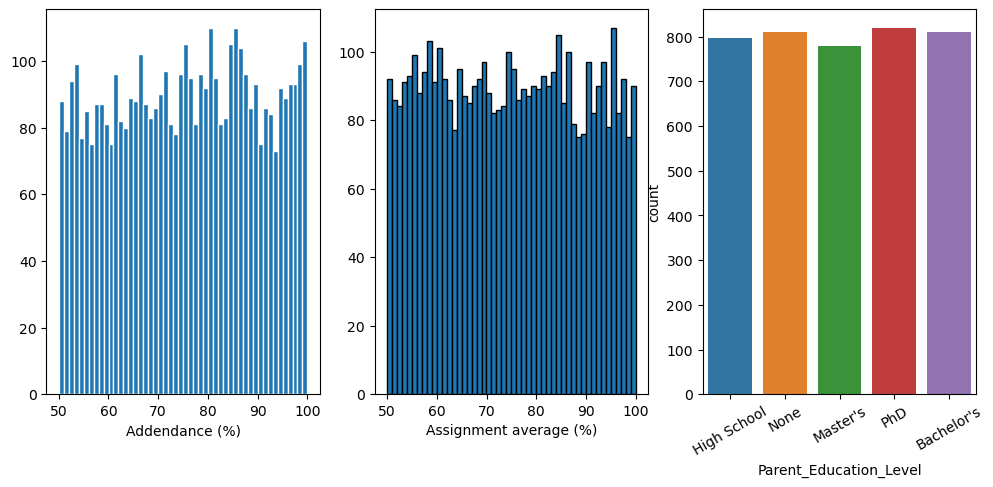

In [7]:
# now let's investigate our missing features
# warnings.filterwarnings("ignore", category=RuntimeWarning)

df = data.rename(columns={"Attendance (%)": "Attendance", "Stress_Level (1-10)": "Stress_Level"})

plt.figure(figsize=(12, 5))
# Attendance distribution
plt.subplot(131)
plt.hist(df.Attendance, bins=50, edgecolor="white")
plt.xlabel("Addendance (%)")

# Assignments distribution
plt.subplot(132)
plt.hist(df.Assignments_Avg, bins=50, edgecolor="black")
plt.xlabel("Assignment average (%)")

# parent education count plot
plt.subplot(133)
sns.countplot(data=df, x="Parent_Education_Level")
plt.xticks(rotation=30)

plt.show()

Let's try grouping by `Department` and use that column to impute the missing values rather than just filling them with the mean. 

In [8]:

df['Attendance'] = df.groupby(["Department"])['Attendance'].transform(lambda x: x.fillna(x.mean()))
df['Assignments_Avg'] = df.groupby(["Department"])['Assignments_Avg'].transform(lambda x: x.fillna(x.mean()))



As for `Parent_Education_Level` it's a categorical variable so let's first get to know the feature a bit more before deciding how to handle the missing values

In [9]:
missing_edu = df.Parent_Education_Level.isna().sum()

print(missing_edu)
df.Parent_Education_Level.unique()


984


array(['High School', 'None', "Master's", 'PhD', nan, "Bachelor's"],
      dtype=object)

Turns out the number of missing values exceed that of individual categories, so it's better to label them as a seperate category to avoid loss

In [10]:
df['Parent_Education_Level'] = df.Parent_Education_Level.fillna("unknown")

df.isna().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance                    0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level                  0
Sleep_Hours_per_Night         0
dtype: int64

# Sorting out Biases
We know from the source that the data contains some biases reguarding the `Grade` and that it's not a reflection of the `Total_Score`. So let's rectify this issue

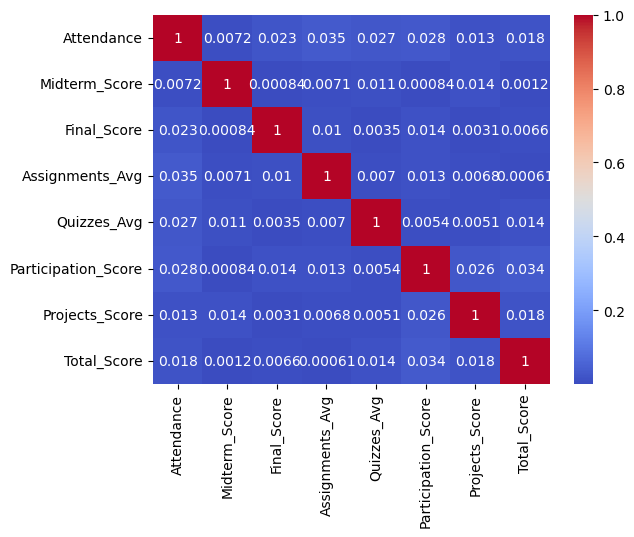

In [11]:
# First off let's check the correlation between other academic factor and the total score
aggregate_cols = ["Attendance",
"Midterm_Score",
"Final_Score",
"Assignments_Avg",
"Quizzes_Avg",
"Participation_Score",
"Projects_Score",
"Total_Score"]

correlations = df[aggregate_cols].corr().abs()

sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

There seems to be no positive correlation between any of the features, so let's fix this. To compute the actual total score we need to assign some **_weights_** to the aggregate columns so we'll do it like this:

- Participation_Score: 0.05
- Assignments_Avg: 0.05
- Quizzes_Avg: 0.1
- Projects_Score: 0.15
- Midterm_Score: 0.25
- Final_Score: 0.4


In [12]:
0.05+0.05+0.1+0.2+0.2+0.4

1.0

In [13]:
# Create a dict assigning every weight to its column.
score_dict = {
"Participation_Score": 0.05,
"Assignments_Avg": 0.05,
"Quizzes_Avg": 0.1,
"Projects_Score": 0.15,
"Midterm_Score": 0.25,
"Final_Score": 0.4
}
# initialize an array of zeros
aggregate = np.zeros(len(df))

# Iterate over the dict of cols and weights
for col, weight in score_dict.items():
    aggregate += df[col].values*weight


df['Total_Score'] = aggregate
df.Total_Score.head()

0    61.587000
1    64.523286
2    77.510500
3    70.998500
4    66.977500
Name: Total_Score, dtype: float64

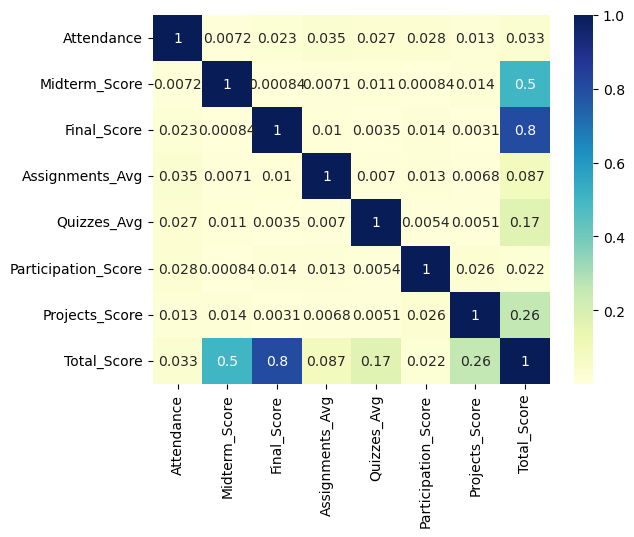

In [14]:
# Now to check for the correlations 

corr = df[aggregate_cols].corr().abs()

sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

Sorting out bias in `Grade`:

In [15]:
def sort_grades(x):
    if x < 50 and x > 0:
        return "F"
    elif x < 55:
        return "E"
    elif x < 65:
        return 'D'
    elif x < 75:
        return 'C'
    elif x < 85:
        return 'B'
    else:
        return 'A'

df['Grade'] = df.Total_Score.apply(sort_grades)
df['Grade'].value_counts()

C    2001
D    1514
B    1076
E     269
A      82
F      58
Name: Grade, dtype: int64

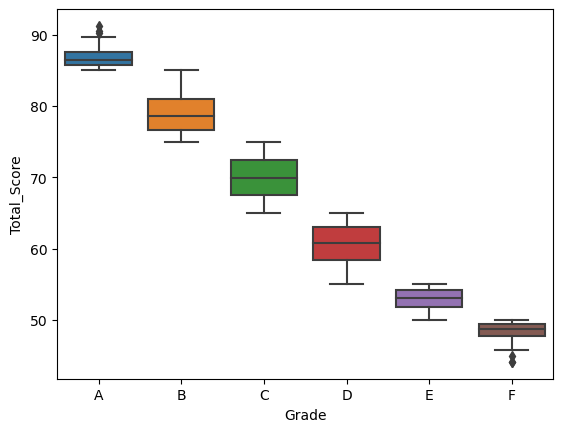

In [16]:
plt.grid(which='major', color="black", axis="x", linewidth=2)

sns.boxplot(x=df.Grade.sort_values(), y=df['Total_Score'])
plt.show()

# EDA

In [18]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level',
       'Sleep_Hours_per_Night'],
      dtype='object')

## Univariate Analysis

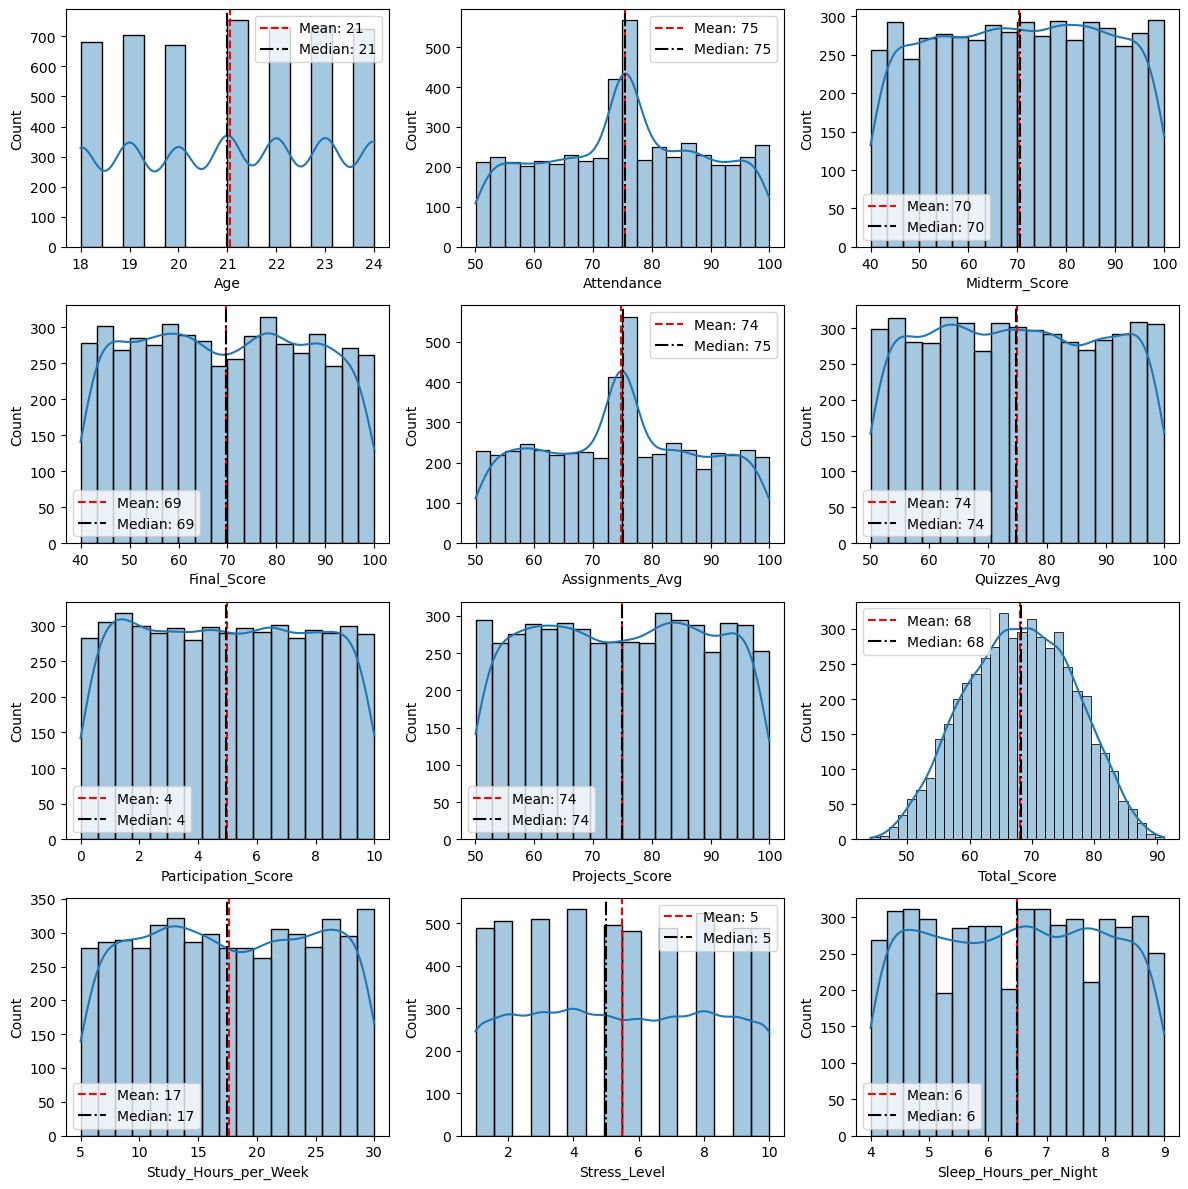

In [19]:
# Univariate analysis of Numeric variables
numeric_cols = df.select_dtypes(exclude="object").columns

nrows = 4
ncols = 3
i = 0
# use the default style
plt.style.use("default")

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

for row in range(nrows):
    for col in range(ncols):
        dist = df[numeric_cols[i]]
        sns.histplot(dist, kde=True, alpha=.4, ax=ax[row, col])
        ax[row, col].axvline(dist.mean(), color="r", linestyle='dashed', label=f"Mean: {int(dist.mean())}")
        ax[row, col].axvline(dist.median(), color="black", linestyle='-.', label=f"Median: {int(dist.median())}")
        ax[row, col].legend()
        i+=1

plt.tight_layout()
plt.show()

All features here have almost the some mean and median values which points out that they are normally distributed with no outliers. But the only really distributed feature is the `Total_Score` column with a bell-shaped distribution due to the feature engineering we performed on it.<br>
The `Age` features distribution is evenly spaced suggesting that it's somehow a categorical column.

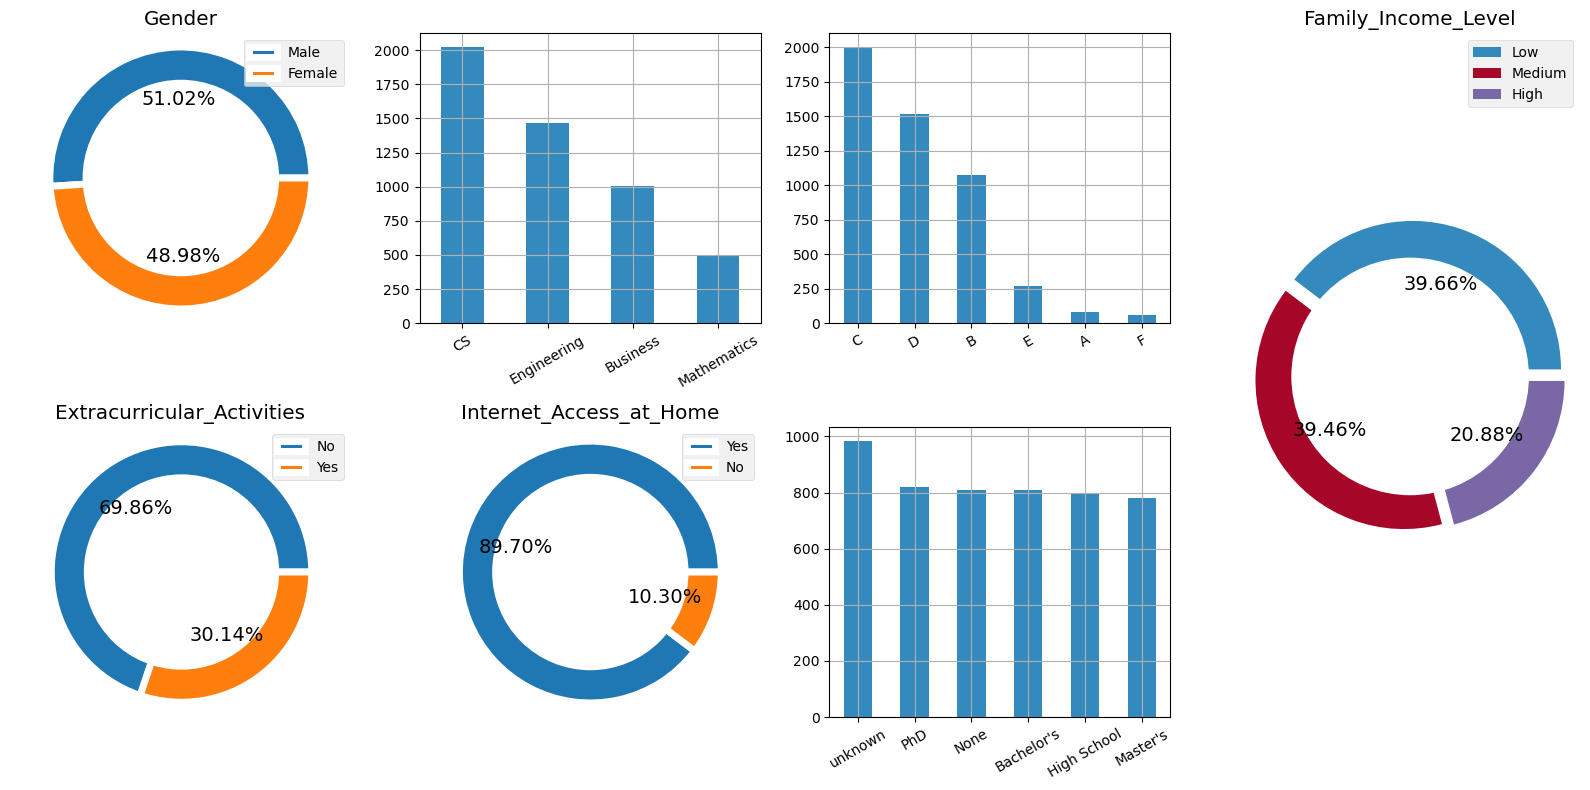

In [20]:
# Univariate analysis of categorical variables

id_fields = ['Student_ID', 'First_Name', "Last_Name", "Email"]

categorical_cols = df.drop(columns=id_fields).select_dtypes(include="object").columns
categorical_cols

rows = 2
cols = 4
i = 0

fig, ax = plt.subplots(nrows=rows, ncols=cols ,figsize=(16, 8))
plt.grid(axis='both', color="black", linewidth=0.5)
plt.style.use("bmh")

for row in range(rows):
    for col in range(cols):
        if categorical_cols[i] == categorical_cols[-1]:
            break
        if col == cols-1:
            continue
        column = categorical_cols[i]
        data = df[column].value_counts()
        # if the number of categories is less or equal to 3 we plot a pie chart
        if df[column].nunique() <= 3:
            ax[row, col].pie(data, autopct="%0.2f%%", wedgeprops=dict(edgecolor="white", linewidth=5), textprops={"fontsize": 14})
            ax[row, col].set_title(column)
            circle = plt.Circle((0, 0), radius=0.75, fc='white')
            ax[row, col].add_artist(circle)
            ax[row, col].legend(data.index)
    
            ax[row, col].axis("equal")
        # else we plot a bar chart
        else: 
            data.plot(kind="bar", ax=ax[row, col])
            ax[row, col].tick_params(axis="x", rotation=30)
        i+=1


# plot the last category
plt.subplot(1, 4, 4)
col = categorical_cols[-1]
data = df[col].value_counts()
if df[col].nunique() <=3:
    plt.pie(data, explode=[0.05]*df[col].nunique(), autopct="%0.2f%%", textprops={"fontsize": 14})
    circle = plt.Circle((0, 0), radius=0.8, fc='white')
    plt.gca().add_artist(circle)
    plt.axis("equal")
    plt.title(col)
    plt.legend(data.index)
else: 
    data.plot(kind="bar")
    

plt.tight_layout()
plt.show()

* There are slightly more male students than female
* Most students don't participate in extracurriculars
* Most students have internet access at home
* There are slightly more families with low income compared to those with medium income.
* There are relatively few students in maths department. Maybe lots of students hate math even though they can't escape it just by running off to **CS** or even worse **Engineering**
* Most students are average with a final grade of **C**.
* There are more parents with unknown level of education, this may be due to some of them beign deceased, or it may be that some didn't go to school rather they focused on other means of income or due to some unknown factor.

## Bivariate Analysis

<!-- - ### What factors contribute most to high student performance?
<hr>

We know for sure that academic factors like `Final_Score`, `Assignments_Avg`, `Quizzes_Avg`, `Midterm_Score`...etc are correlated to students performance, therefore we want to check if other features like `Extracurricular_Activities`, `Internet_Access_at_Home`, `Study_Hours_per_Week` and other demographic and socia-economic features contribute to high performance and good grades overall. -->

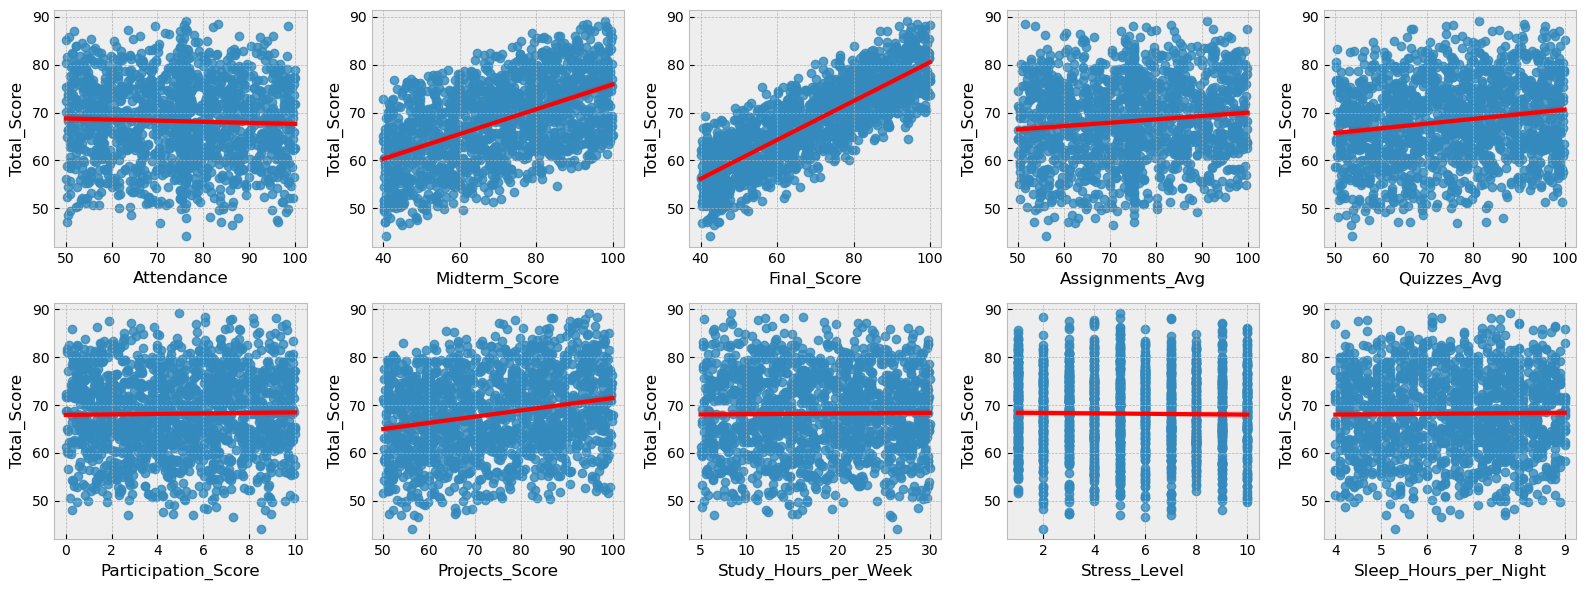

In [21]:
# our target column
target_col = 'Total_Score'

id_fields = ['Student_ID', 'First_Name', "Last_Name", "Email"]

trimmed_df = df.drop(columns=id_fields)

# Categorical Columns
cat_cols = trimmed_df.select_dtypes(include='object').columns

# Categorical Columns
num_cols = trimmed_df.select_dtypes(exclude="object").drop(columns=['Age', target_col]).columns

# Sample to data due to because of much points
sample_df = df.sample(n=int(len(df)*0.3), random_state=50)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(16, 6))
i=0


for row in range(2):
    for col in range(5):
        feature = num_cols[i]
        sns.regplot(data=sample_df, x=feature, y=target_col, line_kws={'color': "red"}, ax=ax[row, col])
        i+=1
        
plt.tight_layout()
plt.show()
# aggregate_cols

With the `Total_Score` as the target column we see a positive linear relationship with the features that were engineered form it apart form those features others seem to have no visual correlation whatsoever, none the less we'll still confirm it with some hypothesis tests.

In [22]:
cat_cols

Index(['Gender', 'Department', 'Grade', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

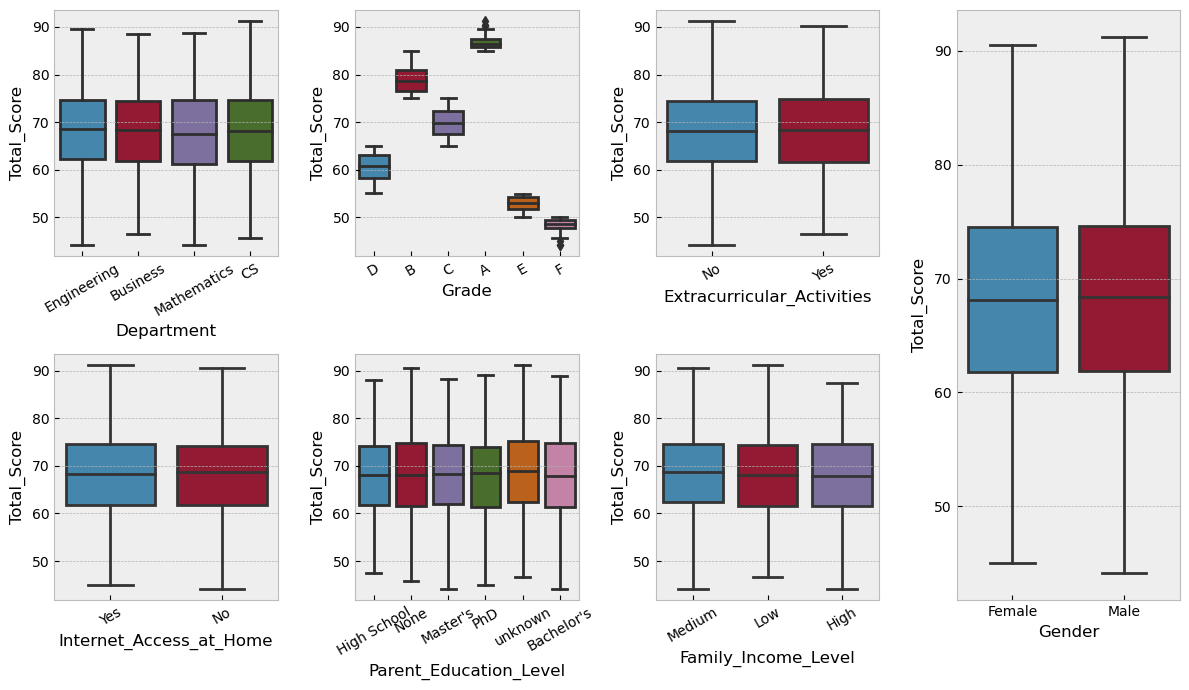

In [23]:
# cat_cols

rows = 2
cols = 4

plt.figure()
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 7))
i = 1

for row in range(rows):
    for col in range(cols):
        if i == 7:
            break
        if col == 3:
            continue
        data = cat_cols[i]
        sns.boxplot(data=df, x=data, y=target_col, ax=ax[row, col])
        ax[row, col].tick_params(axis="x", rotation=30)
        i+=1

plt.subplot(1, 4, 4)
sns.boxplot(data=df, x="Gender", y=target_col)


plt.tight_layout()
plt.show()


`Department` seems to have consistent means across it's categories and looks like same is true for almost all the features except for `Grade` of course which is just a representation of the `Total_Score` feature. Again well confirm whether or not they have relatively same population means with a [**Two-sample t-test**](https://www.statology.org/two-sample-t-test/) or an [**Aonva test**](https://researchmethod.net/anova/)


Extracurricular Ativities and grades.

In [24]:
# Extracurriculars and their impact on grades
grades_tab = pd.crosstab(df.Grade, df.Extracurricular_Activities)

# convert to a frame of proportions
frame = grades_tab.apply(lambda x: (x*100)/sum(x), axis=1)
frame

Extracurricular_Activities,No,Yes
Grade,,
A,68.292683,31.707317
B,68.866171,31.133829
C,70.514743,29.485257
D,70.145310,29.854690
E,66.914498,33.085502
F,74.137931,25.862069


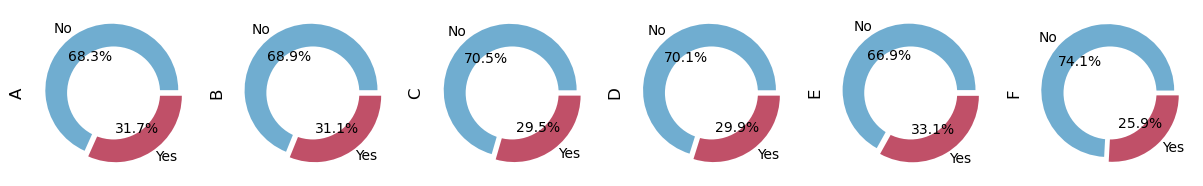

In [25]:
ax = frame.T.plot(kind="pie", stacked=True, subplots=True, figsize=(15, 15),\
                  legend=False, explode=[0.05]*2, autopct="%0.1f%%", wedgeprops=dict(alpha=0.7))

for axis in ax:
    circle = plt.Circle((0, 0), radius=0.7, fc="white")
    axis.add_artist(circle)

# plt.title("Percentage of Extracurricular Activites at every grade")
plt.show()

They all seem to have nearly the same percentage of **_Nos_** and **_yes_** implying that the is no pattern that we can draw form this except that `Extracurricular_Activities` and `Grade` might not be related 

Age

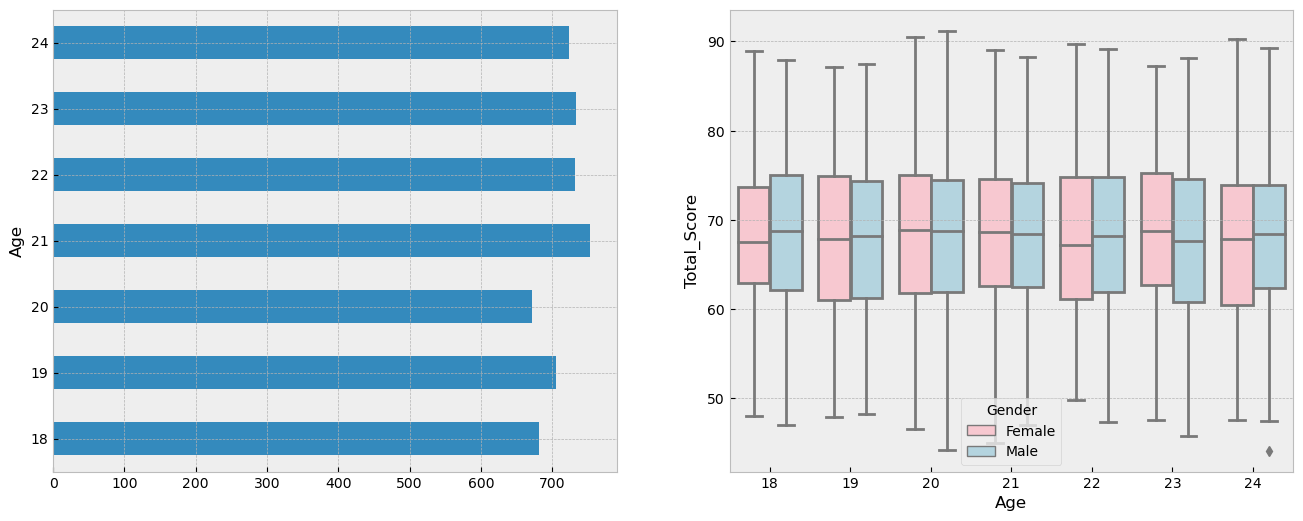

In [26]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
df.groupby("Age").size().plot(kind='barh')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Age", y="Total_Score", hue="Gender", palette={"Male": "lightblue", "Female": "pink"})

plt.show()

Stress levels

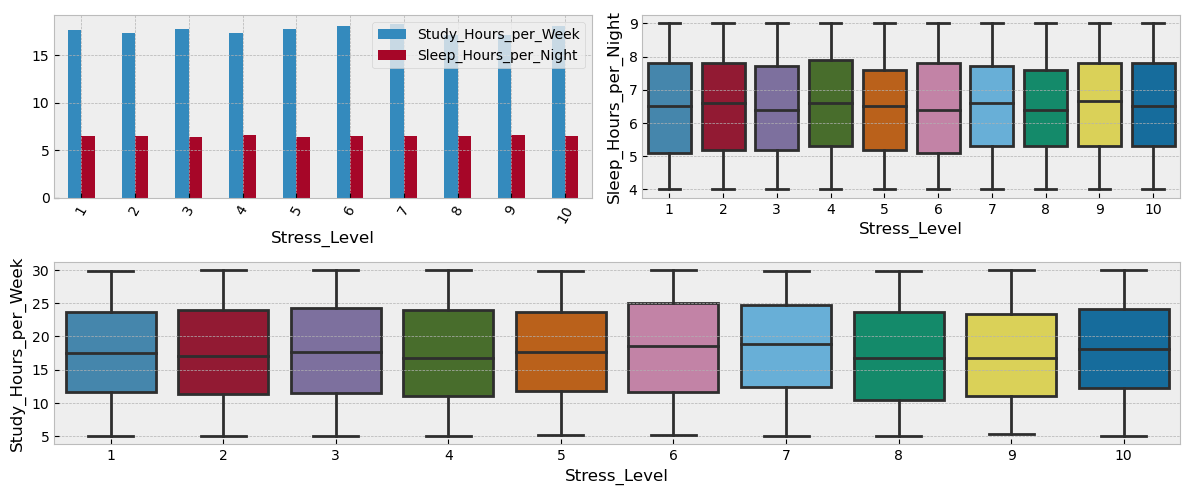

In [27]:
# Stress level analysis
stress_df = df.groupby("Stress_Level")[['Study_Hours_per_Week', "Sleep_Hours_per_Night"]].mean()

plt.figure(figsize=(12, 5))

ax = plt.subplot(2, 2, 1)
stress_df.plot(kind="bar", ax=ax)
ax.tick_params(axis="x", rotation=60)


plt.subplot(2, 2, 2)
sns.boxplot(data=df, x="Stress_Level", y="Sleep_Hours_per_Night")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x="Stress_Level", y="Study_Hours_per_Week")

plt.tight_layout()
plt.show()

Maybe `Study_Hours_per_Week` has a relationship with `Final_Score`

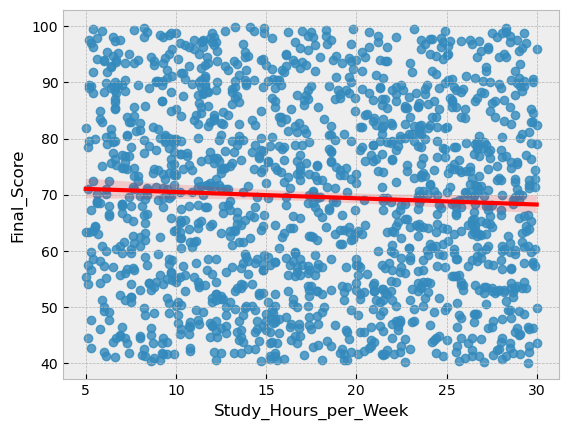

In [28]:
# Let's sample 30% of the data
data = df.sample(frac=0.3, replace=False)

sns.regplot(data=data, x="Study_Hours_per_Week", y="Final_Score", line_kws=dict(color="red"))
plt.show()

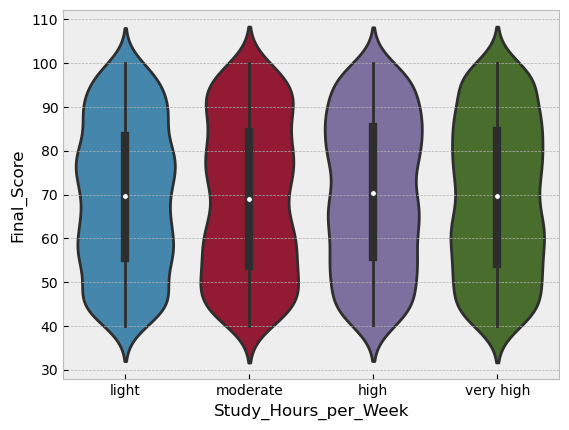

In [29]:
study_cats = pd.qcut(df['Study_Hours_per_Week'], q=4, labels=["light", "moderate", "high", "very high"])

sns.violinplot(x=study_cats, y=df.Final_Score)
plt.show()

Study hours per week

In [30]:
study_grade = df.groupby("Grade")["Study_Hours_per_Week"].mean()
study_grade.reset_index()

,Grade,Study_Hours_per_Week
0,A,17.518293
1,B,17.804368
2,C,17.760920
3,D,17.346896
4,E,18.282156
5,F,16.889655


We see something strange here, the average studying time for those with the grade *E* on average is more than those with other grades. Does that mean studying too much leads to less performance? As they say _"All work without play make Jack a dull boy."_ <br>
We also see that those with _F_ study less on an average, aside form this the average studying times for the rest of the categories are almost equal. But then we can't be too sure so we'll examine the distributions for outliers

In [31]:
# check for outliers
range_ = lambda x: np.max(x) - np.min(x)

study_per_grade = df.groupby("Grade").Study_Hours_per_Week.agg([min, max, len, range_])\
.rename(columns={"<lambda_0>": "Range"})

study_per_grade

,min,max,len,Range
Grade,,,,
A,5.3,30.0,82,24.7
B,5.0,30.0,1076,25.0
C,5.0,30.0,2001,25.0
D,5.0,30.0,1514,25.0
E,5.1,30.0,269,24.9
F,5.1,29.5,58,24.4


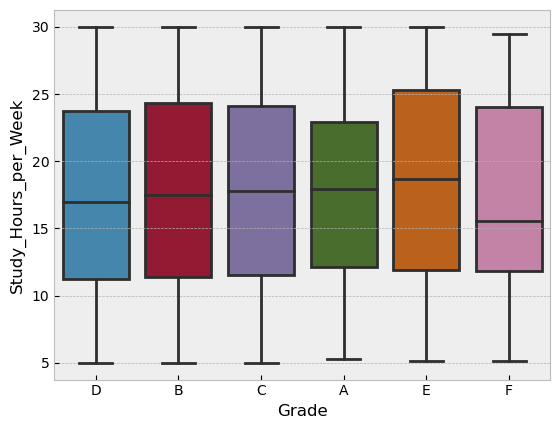

In [32]:
sns.boxplot(data=df, x="Grade", y="Study_Hours_per_Week")
plt.show()

**No extreme outliers**

# Hypothesis Testing

### Two sample T-test
- **Null Hypothesis:** There is no significant difference between the scores both category scores on average.
- **Alternative Hypothesis:** There is a **significant** difference between the scores both category scores on average
- **Significance Threshold**: 0.05 (5%)

In [33]:
from scipy.stats import ttest_ind
# ttest_ind tests whether the 2 distributions have the same population mean, so a high p-value means they have same population mean.

binary_cols = ['Gender', "Extracurricular_Activities", "Internet_Access_at_Home"]

males = df[df.Gender == "Male"].Total_Score
females = df[df.Gender == "Female"].Total_Score

pvals = []
for col in binary_cols:
    unique_vals = df[col].unique()
    class_1 = df[df[col] == unique_vals[0]][target_col]
    class_2 = df[df[col] == unique_vals[1]][target_col]
    
    tstat, p_val = ttest_ind(class_1, class_2, random_state=45)
    if p_val > 0.05:
        print(f"P-value: {round(p_val, 2)} -- There is no significant difference in the population mean ")
    else:
        print(f"P-value: {round(p_val, 2)} -- There is a significant difference in the population mean ")
        
    pvals.append(p_val)


P-value: 0.61 -- There is no significant difference in the population mean 
P-value: 0.81 -- There is no significant difference in the population mean 
P-value: 0.9 -- There is no significant difference in the population mean 


visualizing the test results

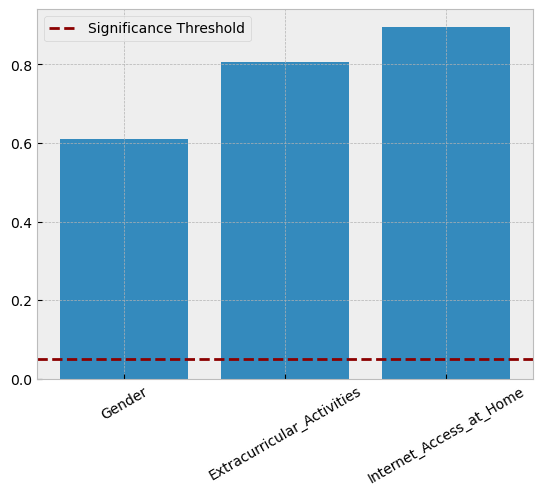

In [34]:
ticks = list(range(3))

plt.bar(ticks, pvals)
plt.xticks(ticks=ticks, labels=binary_cols, rotation=30)
plt.axhline(0.05, color='darkred', linestyle="--", label="Significance Threshold")
plt.legend()
plt.show()

### Anova test


In [35]:
from scipy.stats import f_oneway
# let's create a list to store the p-values of the tests

anova_tests = []

multiclass_vars = [col for col in cat_cols if trimmed_df[col].nunique() > 2]
print(multiclass_vars) # to be deleted after analysis

['Department', 'Grade', 'Parent_Education_Level', 'Family_Income_Level']


#### Departments

In [36]:
departments = df.Department.unique()
li = []

for i in departments: 
    dept = df[df.Department == i].Total_Score
    li.append(dept)
    print(f"{i} >- Done")

Engineering >- Done
Business >- Done
Mathematics >- Done
CS >- Done


In [37]:
fstat, p_val = f_oneway(li[0], li[1], li[2], li[3])

# append to the list
anova_tests.append(p_val)

if p_val > 0.05:
    print(f"P-value: {round(p_val, 2)} -- There is no significant difference in the population mean between the departments ")
else:
    print(f"P-value: {round(p_val, 2)} -- There is a significant difference in the population mean between the departments ")

P-value: 0.34 -- There is no significant difference in the population mean between the departments 


In [38]:
# Print out the means
dept_means = df.groupby("Department").Total_Score.mean()
dept_means.reset_index()

,Department,Total_Score
0,Business,68.189535
1,CS,67.968098
2,Engineering,68.472162
3,Mathematics,67.930428


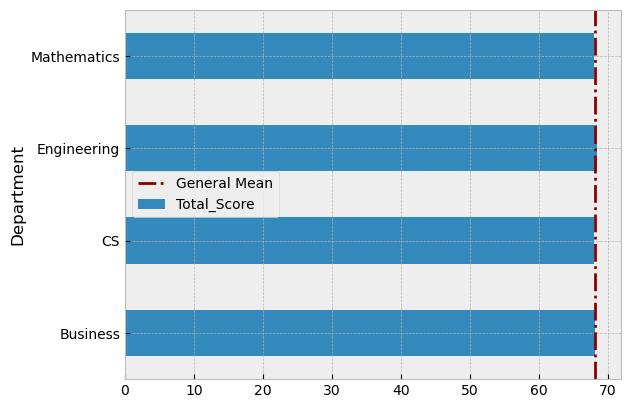

In [39]:
# Visualize the population means
general_mean = df["Total_Score"].mean()

dept_means.plot(kind="barh")
plt.axvline(general_mean, label="General Mean", linestyle="-.", color="darkred")
plt.legend()
plt.show()

#### Education Level

In [40]:
column = "Parent_Education_Level"
education_levels = df[column].unique() # 5 categories
li = []

for i in education_levels:
    edu = df[df[column] == i].Total_Score
    li.append(edu)
    print(f"{i} >- Done")

High School >- Done
None >- Done
Master's >- Done
PhD >- Done
unknown >- Done
Bachelor's >- Done


In [41]:
fstat, p_val = f_oneway(li[0], li[1], li[2], li[3], li[4])

# append to the list
anova_tests.append(p_val)

if p_val > 0.05:
    print(f"P-value: {round(p_val, 2)} -- There is no significant difference in the population means ")
else:
    print(f"P-value: {round(p_val, 2)} -- There is a significant difference in the population means ")

P-value: 0.31 -- There is no significant difference in the population means 


In [42]:
# Print out the population means
education_means = df.groupby(column).Total_Score.mean()

education_means.reset_index()

,Parent_Education_Level,Total_Score
0,Bachelor's,67.969055
1,High School,68.070378
2,Master's,68.063827
3,None,68.097094
4,PhD,67.920741
5,unknown,68.701609


[]

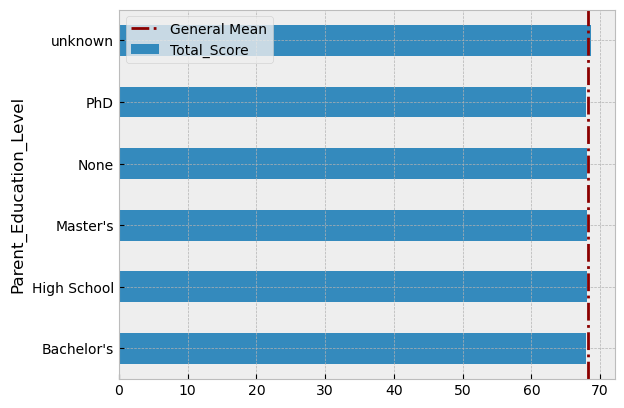

In [43]:
# Visualize
education_means.plot(kind="barh")
plt.axvline(general_mean, label="General Mean", linestyle="-.", color="darkred")
plt.legend()
plt.plot()

#### Family Income Level

In [44]:
column = "Family_Income_Level"

low = df.Total_Score[df[column] == "Low"]
medium = df.Total_Score[df[column] == "Medium"]
high = df.Total_Score[df[column] == "High"]

fstat, p_val = f_oneway(low, medium, high)

# append to the list
anova_tests.append(p_val)

if p_val > 0.05:
    print(f"P-value: {round(p_val, 2)} -- There is no significant difference in the population means ")
else:
    print(f"P-value: {round(p_val, 2)} -- There is a significant difference in the population means ")

P-value: 0.16 -- There is no significant difference in the population means 


In [45]:
income_means = df.groupby(column).Total_Score.mean()
income_means.reset_index()

,Family_Income_Level,Total_Score
0,High,67.986155
1,Low,67.962597
2,Medium,68.442676


[]

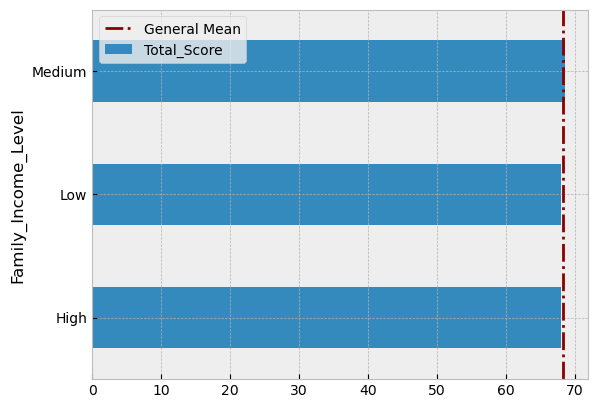

In [46]:
# Visualize
income_means.plot(kind="barh")
plt.axvline(general_mean, label="General Mean", linestyle="-.", color="darkred")
plt.legend()
plt.plot()

#### Study hours per week
we'll test our assumptions from earlier whether or not there is a **significant** difference in their population mean with respect to grades.

In [47]:
column = "Study_Hours_per_Week"
grades = sorted(df.Grade.unique())

li = []

for i in grades:
    edu = df[df["Grade"] == i][column]
    edu.name = i
    li.append(edu)
    print(f"{i} >- Done")

A >- Done
B >- Done
C >- Done
D >- Done
E >- Done
F >- Done


In [48]:
fstat, p_value = f_oneway(li[0], li[1], li[2], li[3], li[4], li[5])

if p_val > 0.05:
    print(f"P-value: {round(p_val, 2)} -- There is no significant difference in the population means ")
else:
    print(f"P-value: {round(p_val, 2)} -- There is a significant difference in the population means ")

P-value: 0.16 -- There is no significant difference in the population means 


### Chi-square test  

In [49]:
cat_cols = ['Gender', 'Department', "Age", 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level', "Stress_Level"]

result = {}

for col in cat_cols:
    Xtab = pd.crosstab(df[col], df['Grade'])
    # Chi-square test returns 4 values
    dist, p_value, dof, expected = chi2_contingency(Xtab)
    result[col] = p_value

print(result)

{'Gender': 0.6868087188581699, 'Department': 0.5563245469905953, 'Age': 0.2834491205113981, 'Extracurricular_Activities': 0.7493523819213832, 'Internet_Access_at_Home': 0.14236016707459798, 'Parent_Education_Level': 0.6440668663156719, 'Family_Income_Level': 0.7303902995142052, 'Stress_Level': 0.6668116377721662}


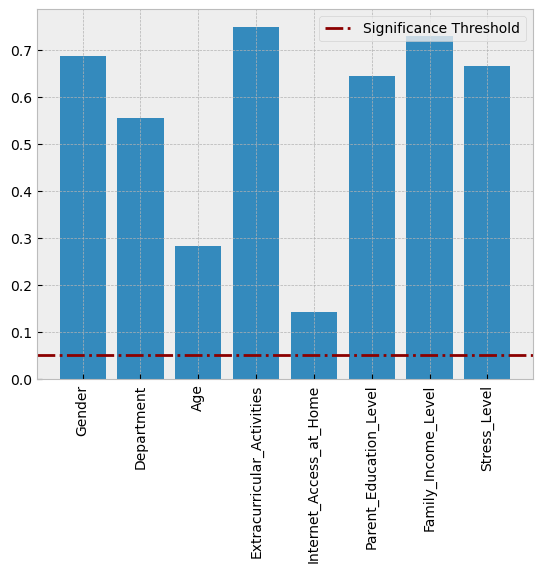

In [50]:
# Visualize the results

ticks = list(range(len(result)))

ax = plt.bar(ticks, result.values())
plt.xticks(ticks=ticks, labels=result.keys(), rotation=90)
plt.axhline(0.05, label="Significance Threshold", linestyle="-.", color="darkred")
plt.legend()
plt.show()

Given our significance threshold of **0.05 (5%)** None of the

# 🏁🔥Conclusion
---
Alhamdulillah, in this project, we successfully analyzed the Students Performance Dataset to identify correlations, relationships, and key factors influencing academic success. We addressed potential biases, cleaned the data, imputed missing values, visualized trends, and conducted various hypothesis tests. As a result, we were able to answer our initial research questions:

1. What factors contribute most to high student performance?
    - Although there were biases regarding Total_Score and Grade, we refined our analysis by engineering features that better reflect performance, with features such as Participation_Score, Assignments_Avg, Quizzes_Avg, Projects_Score, Midterm_Score, and Final_Score.

2. Does family background influence academic success?
    - No. Both visualizations and hypothesis tests indicate no significant difference in performance among students from different family backgrounds.

3. How does gender relate to scores?
    - Gender has no correlation with Total_Score, as confirmed through statistical tests.

4. Do extracurricular activities impact grades?
    - No. Although participation in extracurricular activities varies among students, there is no statistically significant difference in academic performance between those who participate and those who do not.

5. Do stress levels negatively impact academic performance?
    - Stress levels do not significantly affect overall performance. Students who reported high stress and those with low stress had similar average scores, as confirmed by hypothesis testing.

6. Are students with more sleep performing better?
    - No strong relationship was found between sleep hours and academic performance.

7. Is there a significant difference in the average scores across departments?
    - No. There is no significant variation in average scores among the four departments.
---
## 🔍Further Insights
Overall, this dataset does not reveal strong relationships between many socio-economic and demographic features and academic performance. Instead, a student's success is primarily influenced by performance in key academic assessments such as quizzes, class projects, assignments, and exams. This suggests that students aiming to improve their grades should focus on these areas.

One surprising finding was that sleep hours and stress levels had no measurable impact on student performance, and study hours per week had only a minor effect. For instance, students who received an "F" studied only slightly less than others, and those with an "E" studied more than all other groups. This challenges the assumption that studying longer directly leads to better academic results.

Ultimately, academic success is not solely dependent on study habits. Factors such as class attendance, consistency, and effective time management may play a more crucial role. Additionally, external influences like peer groups, home environment, and personal experiences could contribute to performance in ways not captured by this dataset.